In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
file=pd.read_excel('/content/drive/MyDrive/Details (1).xlsx')

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                998 non-null    float64
 1   Gender            999 non-null    int64  
 2   Age               996 non-null    float64
 3   Married           998 non-null    float64
 4   Employment        998 non-null    float64
 5   Two_Four_Wheeler  997 non-null    float64
 6   Cinema_Likes      998 non-null    float64
 7   Money             998 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


In [ ]:
files=pd.DataFrame(file)
files

,ID,Gender,Age,Married,Employment,Two_Four_Wheeler,Cinema_Likes,Money
0,1.0,1,25.0,1.0,4.0,0.0,2.0,693549.0
1,14.0,14,14.0,14.0,14.0,14.0,14.0,14.0
2,14.0,14,14.0,14.0,14.0,14.0,14.0,14.0
3,14.0,14,14.0,14.0,14.0,14.0,14.0,14.0
4,14.0,14,14.0,14.0,14.0,14.0,14.0,14.0
...,...,...,...,...,...,...,...,...
994,995.0,0,25.0,0.0,5.0,0.0,1.0,500460.0
995,996.0,0,22.0,0.0,5.0,1.0,3.0,809100.0
996,997.0,0,23.0,0.0,3.0,0.0,1.0,569768.0
997,998.0,1,24.0,1.0,2.0,1.0,3.0,564298.0


In [ ]:
file.duplicated().sum()

12

In [ ]:
file.columns

Index(['ID', 'Gender', 'Age', 'Married', 'Employment', 'Two_Four_Wheeler',
       'Cinema_Likes', 'Money'],
      dtype='object')

In [ ]:
file.head()

,ID,Gender,Age,Married,Employment,Two_Four_Wheeler,Cinema_Likes,Money
0,1.0,1,25.0,1.0,4.0,0.0,2.0,693549.0
1,14.0,14,14.0,14.0,14.0,14.0,14.0,14.0
2,14.0,14,14.0,14.0,14.0,14.0,14.0,14.0
3,14.0,14,14.0,14.0,14.0,14.0,14.0,14.0
4,14.0,14,14.0,14.0,14.0,14.0,14.0,14.0


In [ ]:
file.tail()

,ID,Gender,Age,Married,Employment,Two_Four_Wheeler,Cinema_Likes,Money
994,995.0,0,25.0,0.0,5.0,0.0,1.0,500460.0
995,996.0,0,22.0,0.0,5.0,1.0,3.0,809100.0
996,997.0,0,23.0,0.0,3.0,0.0,1.0,569768.0
997,998.0,1,24.0,1.0,2.0,1.0,3.0,564298.0
998,999.0,1,21.0,0.0,2.0,1.0,2.0,583659.0


In [ ]:
file.describe()

,ID,Gender,Age,Married,Employment,Two_Four_Wheeler,Cinema_Likes,Money
count,998.000000,999.000000,996.000000,998.000000,998.000000,997.000000,998.000000,998.000000
mean,500.564128,0.684685,22.867470,0.694389,3.169339,0.713139,2.195391,735393.198397
std,288.132874,1.664096,1.765244,1.663759,1.936396,1.662230,1.620115,170000.779035
min,1.000000,0.000000,14.000000,0.000000,1.000000,0.000000,1.000000,14.000000
25%,251.250000,0.000000,22.000000,0.000000,2.000000,0.000000,1.000000,607032.000000
50%,500.500000,1.000000,23.000000,1.000000,3.000000,1.000000,2.000000,752938.000000
75%,749.750000,1.000000,24.000000,1.000000,4.000000,1.000000,3.000000,868871.000000
max,999.000000,14.000000,25.000000,14.000000,14.000000,14.000000,14.000000,999597.000000


In [ ]:
file.shape

(999, 8)

In [ ]:
file.dtypes

ID                  float64
Gender                int64
Age                 float64
Married             float64
Employment          float64
Two_Four_Wheeler    float64
Cinema_Likes        float64
Money               float64
dtype: object

(array([ 14.,   0.,   0.,   0.,   0.,   0., 198., 195., 210., 379.]),
 array([14. , 15.1, 16.2, 17.3, 18.4, 19.5, 20.6, 21.7, 22.8, 23.9, 25. ]),
 <a list of 10 Patch objects>)

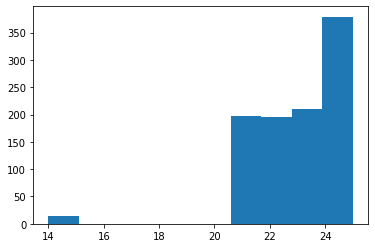

In [ ]:
plt.hist(file.Age)

In [ ]:
missing_values=file.columns[file.isnull().any()]

file[missing_values].isnull().sum()



ID                  1
Age                 3
Married             1
Employment          1
Two_Four_Wheeler    2
Cinema_Likes        1
Money               1
dtype: int64

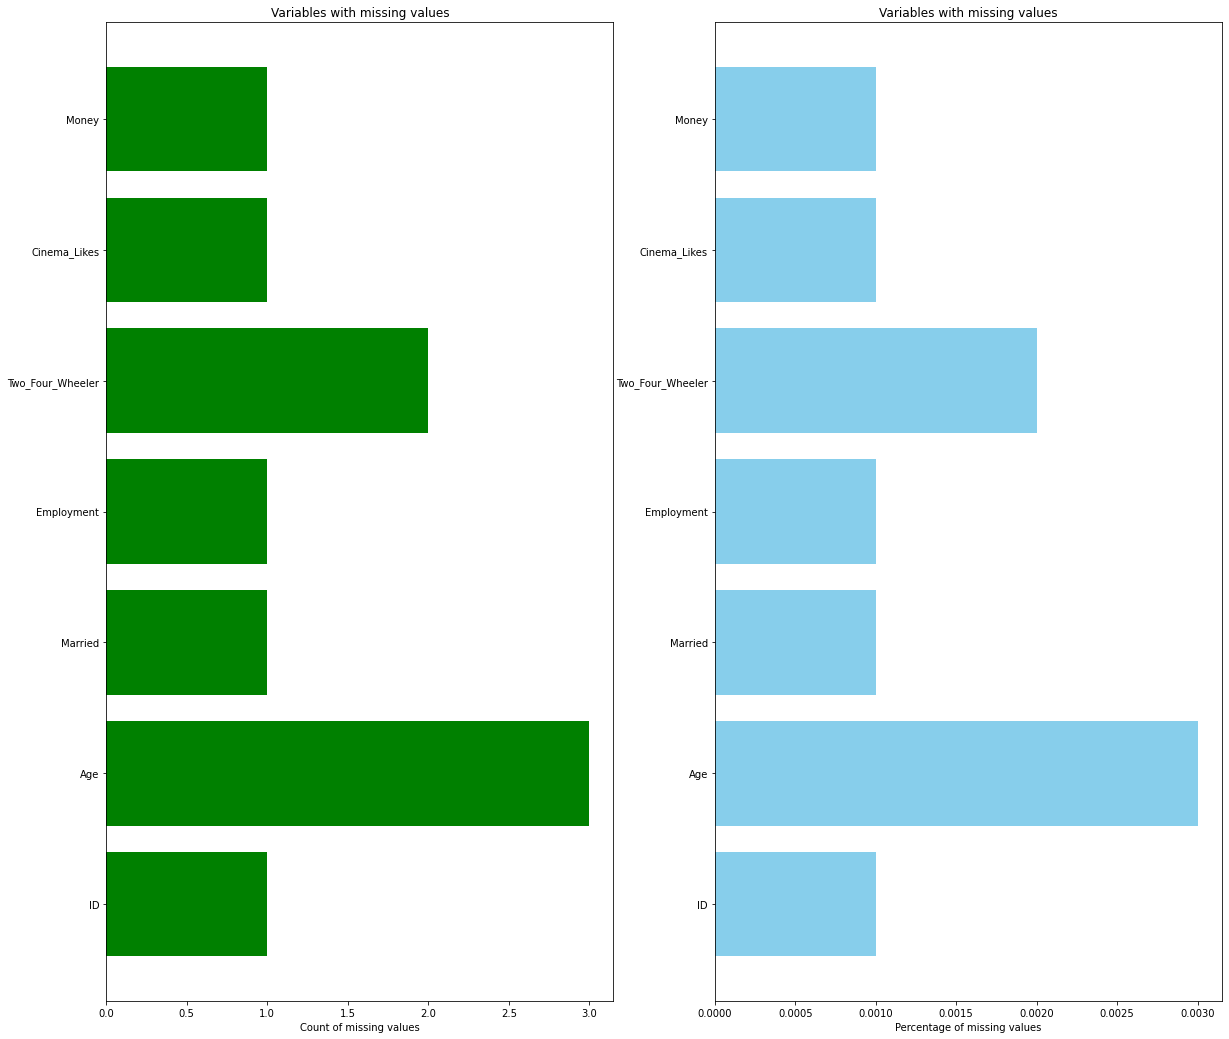

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
# To hold variable names
labels = []

# To hold the count of missing values for each variable
valuecount = []

# To hold the percentage of missing values for each variable
percentcount = []

for col in missing_values:
    labels.append(col)
    valuecount.append(file[col].isnull().sum())
    percentcount.append(file[col].isnull().sum()/file.shape[0])
   
ind = np.arange(len(labels))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,18))

rects = ax1.barh(ind, np.array(valuecount), color='green')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation='horizontal')
ax1.set_xlabel("Count of missing values")
ax1.set_title("Variables with missing values");

rects = ax2.barh(ind, np.array(percentcount), color='skyblue')
ax2.set_yticks(ind)
ax2.set_yticklabels(labels, rotation='horizontal')
ax2.set_xlabel("Percentage of missing values")
ax2.set_title("Variables with missing values");



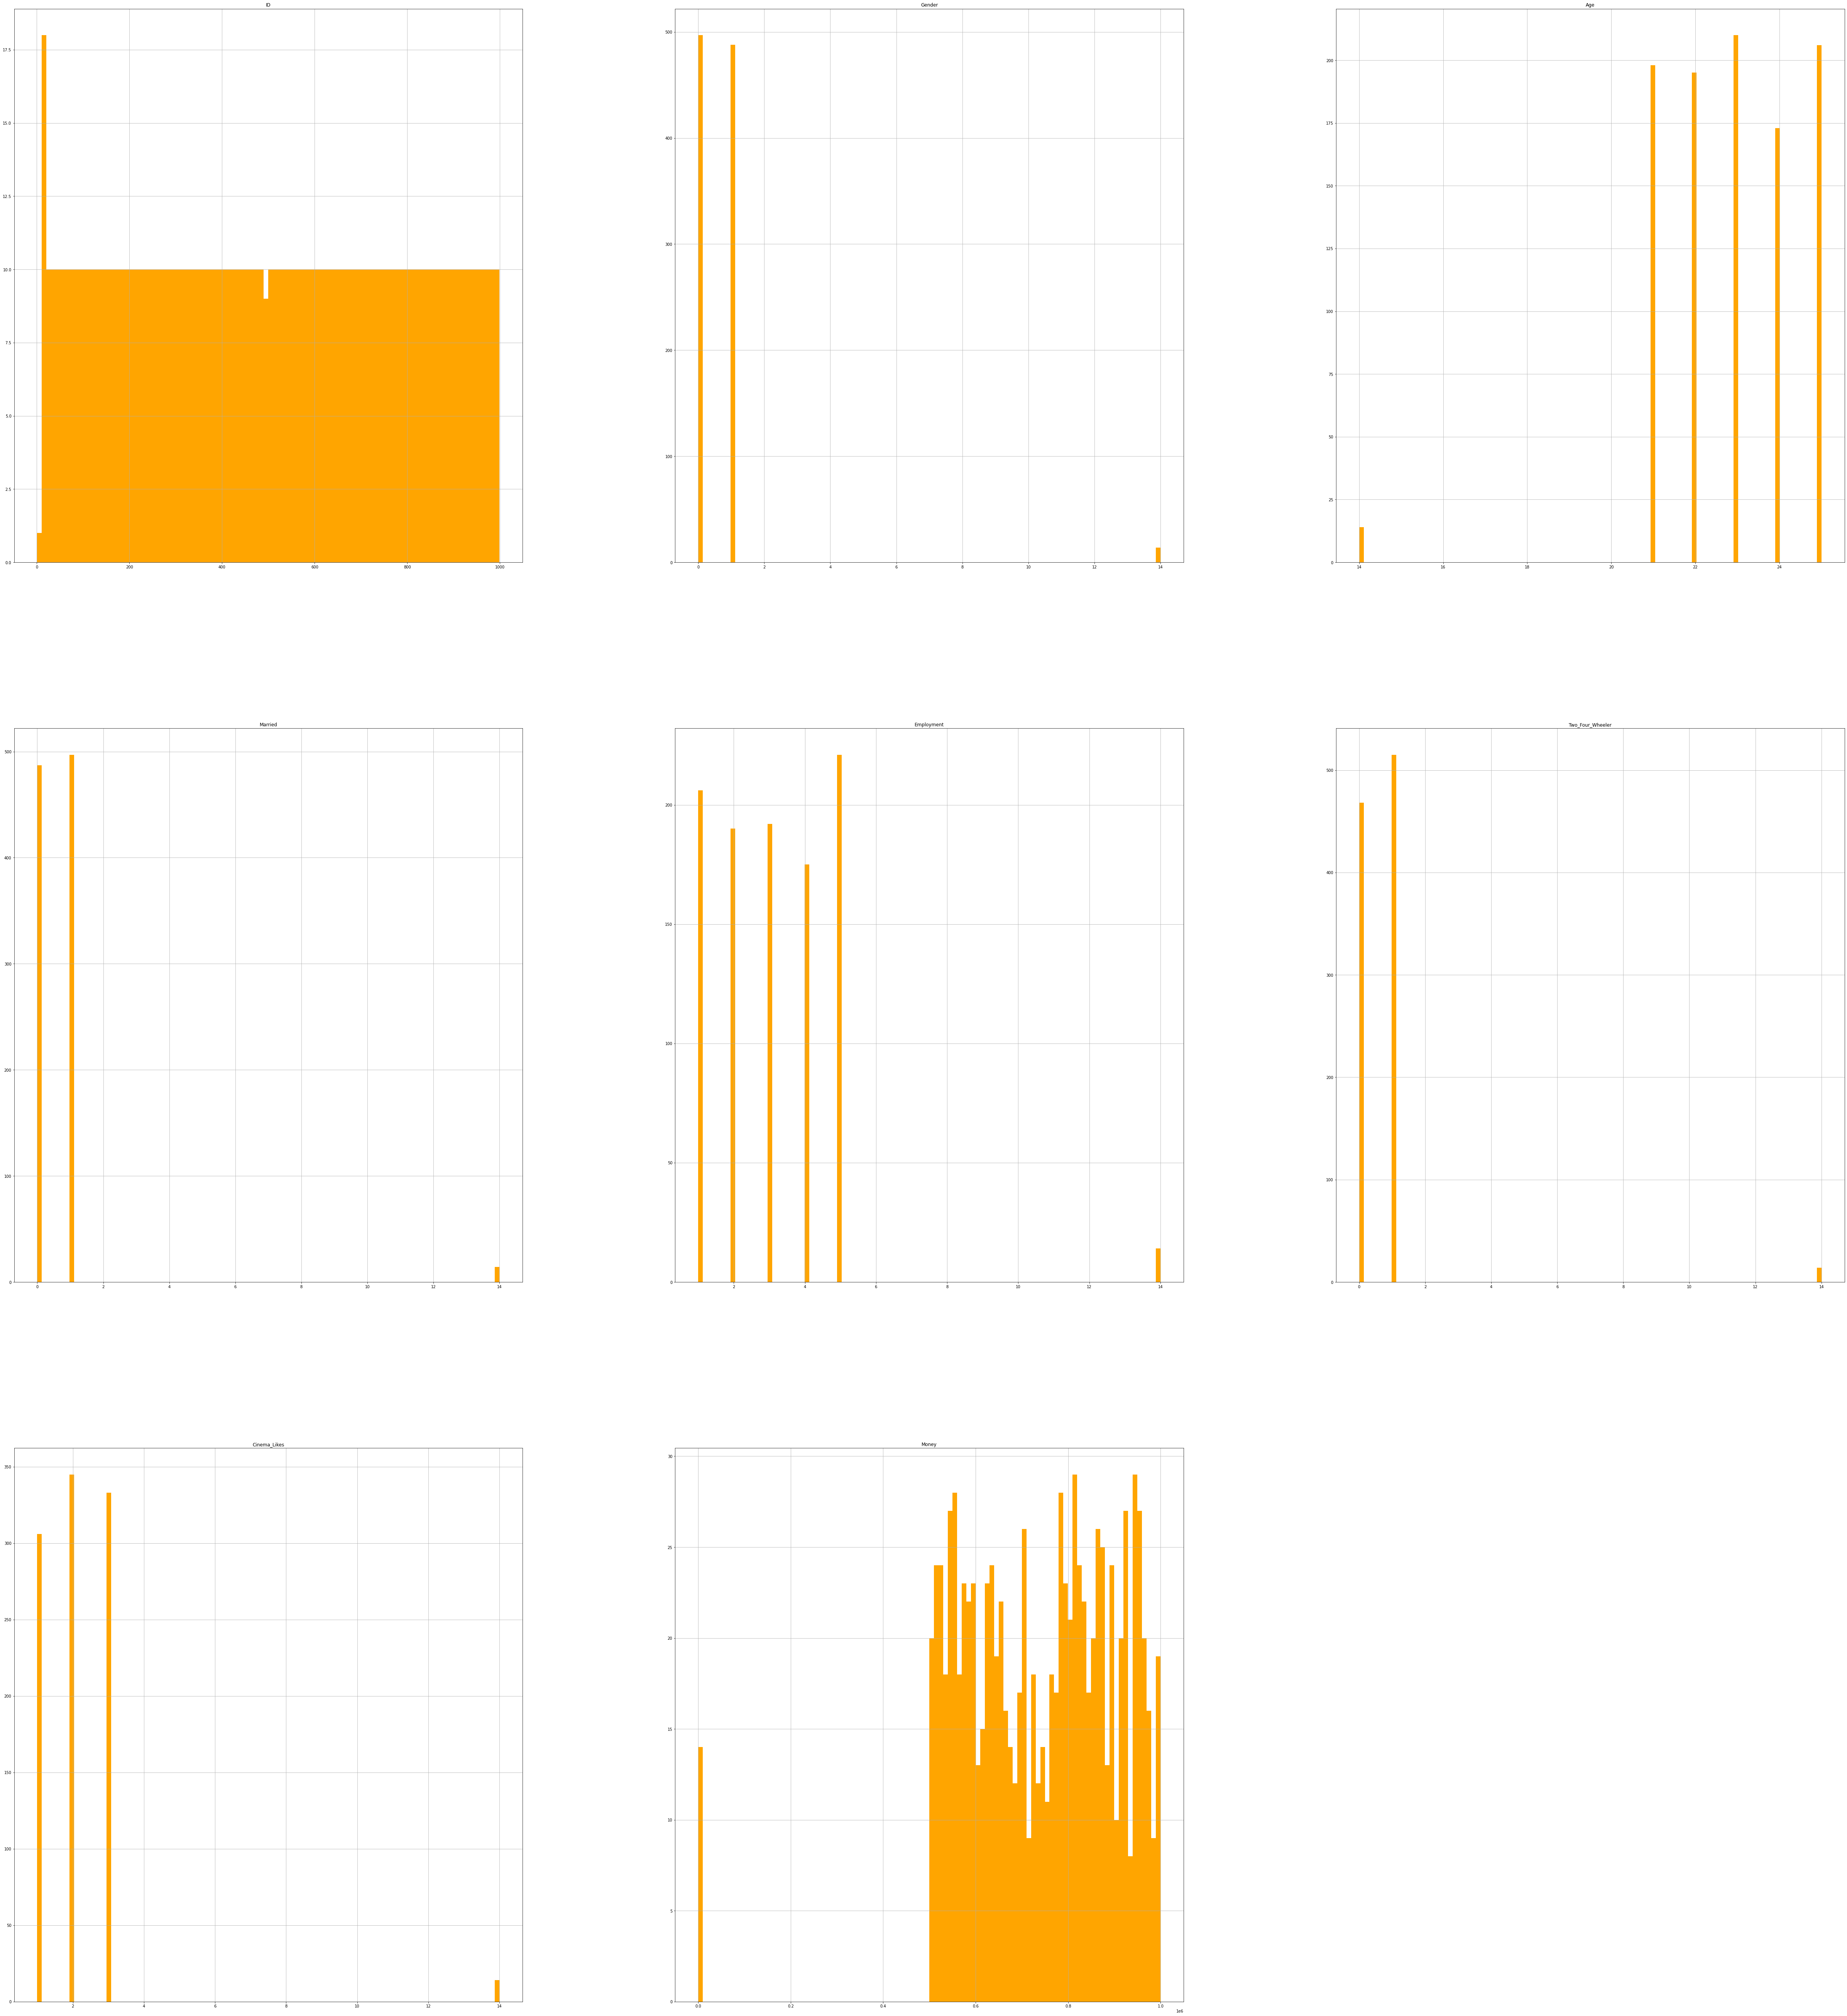

In [ ]:
file.hist(bins=100, figsize=(85,95),color='orange')
plt.show()

In [ ]:
corr=file.corr()
import seaborn as sns

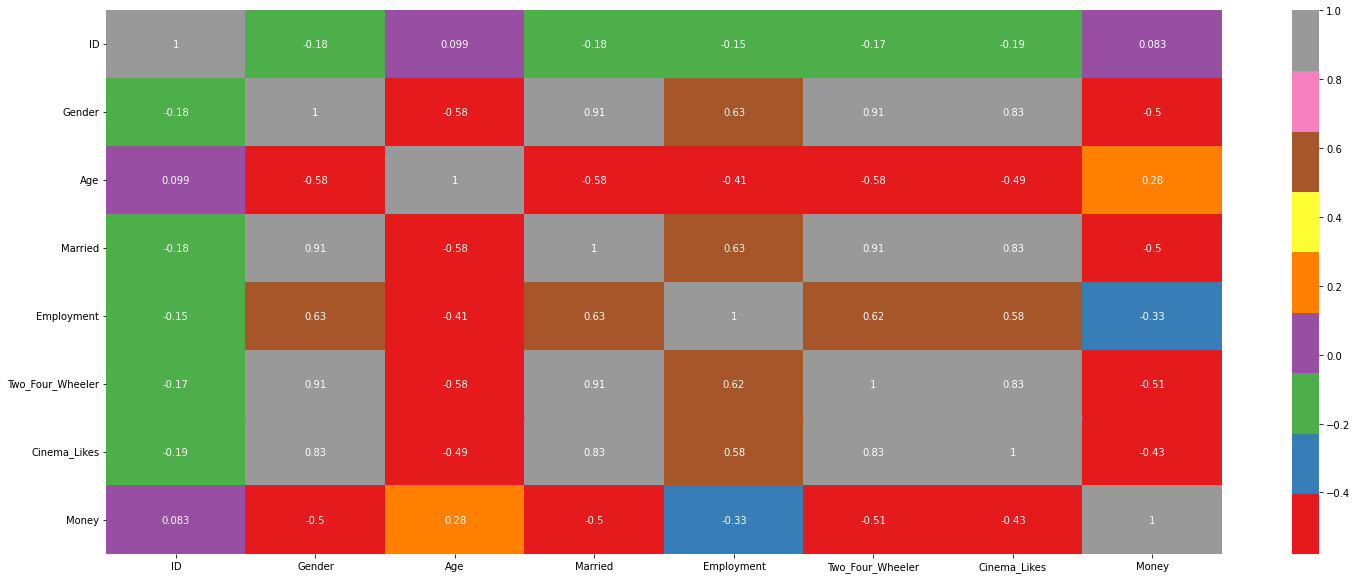

In [ ]:
plt.figure(figsize=(25,10))

sns.heatmap(corr,annot=True,cmap='Set1')

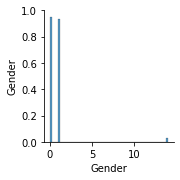

In [ ]:
import seaborn as sns
sns.pairplot(file,kind='box')

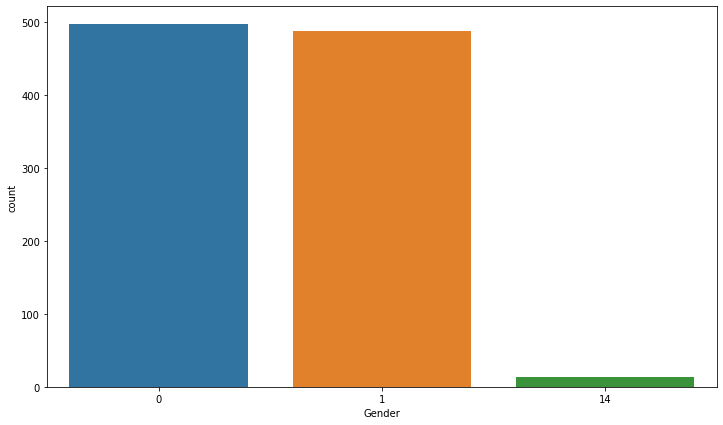

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=file, x='Gender')

In [ ]:
file.corr().style.background_gradient(cmap="icefire")

,ID,Gender,Age,Married,Employment,Two_Four_Wheeler,Cinema_Likes,Money
ID,1.000000,-0.184468,0.099081,-0.184775,-0.154838,-0.170598,-0.187721,0.083080
Gender,-0.184468,1.000000,-0.578303,0.911666,0.634151,0.913473,0.830534,-0.497052
Age,0.099081,-0.578303,1.000000,-0.575833,-0.412790,-0.577057,-0.493615,0.284189
Married,-0.184775,0.911666,-0.575833,1.000000,0.629939,0.908413,0.829267,-0.497668
Employment,-0.154838,0.634151,-0.412790,0.629939,1.000000,0.621527,0.582015,-0.328572
Two_Four_Wheeler,-0.170598,0.913473,-0.577057,0.908413,0.621527,1.000000,0.830994,-0.506021
Cinema_Likes,-0.187721,0.830534,-0.493615,0.829267,0.582015,0.830994,1.000000,-0.429894
Money,0.083080,-0.497052,0.284189,-0.497668,-0.328572,-0.506021,-0.429894,1.000000


In [ ]:
p0=file.Money.min()
p100=file.Money.max()



In [ ]:
q1=file.Money.quantile(0.25)
q2=file.Money.quantile(0.5)
q3=file.Money.quantile(0.75)



In [ ]:
iqr=q3-q1
iqr


261839.0

In [ ]:
lower_cutoff=q1-1.5*iqr
lower_cutoff



214273.5

In [ ]:
upper_cutoff=q3+1.5*iqr
upper_cutoff


1261629.5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


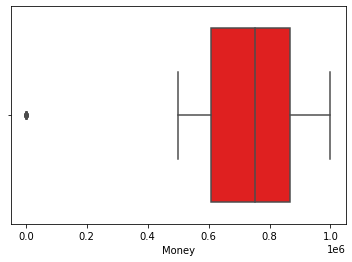

In [ ]:
sns.boxplot(file.Money,color='red')

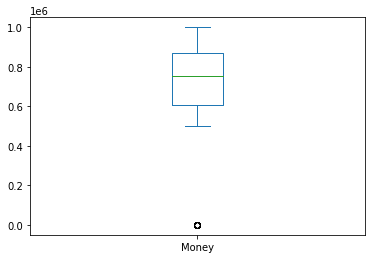

In [ ]:
file.Money.clip(upper=upper_cutoff)
file.Money.plot(kind='box')

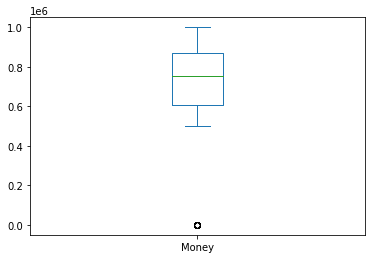

In [ ]:
file.Money.clip(upper=upper_cutoff,inplace=True)
file.Money.plot(kind='box')

In [ ]:
file.isna().sum()

ID                  1
Gender              0
Age                 3
Married             1
Employment          1
Two_Four_Wheeler    2
Cinema_Likes        1
Money               1
dtype: int64

In [ ]:
file.isna().sum().sort_values(ascending=False)


Age                 3
Two_Four_Wheeler    2
ID                  1
Married             1
Employment          1
Cinema_Likes        1
Money               1
Gender              0
dtype: int64

In [ ]:
file.isna().sum()/file.shape[0]

ID                  0.001001
Gender              0.000000
Age                 0.003003
Married             0.001001
Employment          0.001001
Two_Four_Wheeler    0.002002
Cinema_Likes        0.001001
Money               0.001001
dtype: float64

In [ ]:
file.dropna(axis=1,inplace=True)
file

,Gender
0,1
1,14
2,14
3,14
4,14
...,...
994,0
995,0
996,0
997,1


In [ ]:
file.select_dtypes(['float64','int64']).corr()

,Gender
Gender,1.0


In [ ]:
file.Money.hist()
plt.show()